# Business Case: Walmart-Confidence Interval and CLT - 01-Jan-2024

## About Walmart

***Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.***

## Business Problem

***The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).***

## Objective

- ***Investigating the purchasing habits of customers (more specifically, the amount of purchase) in relation to their gender and various other factors to guide the company in making more effective decisions.***
- ***Grasp the spending patterns of both men and women to enable the business to make accurate decisions.***
-   ***Do females outspend males on Black Friday?***

In [1]:
import pandas as pd #to read the datasets
import numpy as np # to work with arrays, single or multidimentional array
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import plotly.express as px # for data visualization

### Loading csv file data to Pandas DataFrame

In [2]:
df = pd.read_csv("walmart_data.csv")

In [3]:
# For Correlation Analysis
df2 = df.loc[:,['Occupation','Purchase','Product_Category']] 

In [4]:
# function to change the Marital status from binary to categorical
def stschange(x):
    if x == 1:
        res = "Married"
    else:
        res = "Unmarried"
    return res

In [5]:
df["Marital_Status"] = df["Marital_Status"].apply(stschange)

### Sense check of Dataframe

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


### Verifying number of Rows & Columns present in the dataset

In [7]:
print(f"No. of Rows : {df.shape[0]}\nNo. of Columns : {df.shape[1]}")

No. of Rows : 550068
No. of Columns : 10


### Verifying Name of Columns

In [8]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

### Column wise Info about Data types, Name and Null value status

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 42.0+ MB


In [10]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


## Changing the Data types of  [Occupation, Marital_Status, Product_Category]

In [11]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


### Verifying basic Statistical Summary

In [12]:
df.describe()
# df.describe(include="all")

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


#### Outliers could possibly exist in the purchase amount.

### Checking the Dupliate entries in the entire Dataframe

In [13]:
df.duplicated().sum()

0

#### The above result indicates that there is No duplicate records in this dataset

### Verifying Number of Null values column wise in the entire dataset

In [14]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### The dataset is free from any missing values.

## Non-Graphical Analysis

### Verifying the Number of Unique values on each columns & respective values

In [15]:
for i in df.columns:
    print("~"*115)
    print(i,"--> Unique Value Count->[",df[i].nunique(), "] Unique Values are -->", df[i].unique())
print("~"*115)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
User_ID --> Unique Value Count->[ 5891 ] Unique Values are --> [1000001 1000002 1000003 ... 1004113 1005391 1001529]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Product_ID --> Unique Value Count->[ 3631 ] Unique Values are --> ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Gender --> Unique Value Count->[ 2 ] Unique Values are --> ['F' 'M']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Age --> Unique Value Count->[ 7 ] Unique Values are --> ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Value Count & Percentage contributions of various categorical Attributes

In [16]:
lsts = ['Gender','Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status', 'Product_Category']
print("*"*75)
for i in lsts:
    ls = sorted(set(df[i].values))
    print(f"Marginal Probability of [{i}] with Unique[User_ID] are given below:")
    for j in ls:
        #print(j,"-->","Count->",len(df[df[i]==j]), "->",round(len(df[df[i]==j])/len(df[i])*100,2),"%")
        df33 = df.loc[df[i]==j]
        x = df33['User_ID'].nunique()
        y = df["User_ID"].nunique()
        print(j,"-->","Count->",x,"->",round(x/y*100,2),"%")
    print("*"*75)

***************************************************************************
Marginal Probability of [Gender] with Unique[User_ID] are given below:
F --> Count-> 1666 -> 28.28 %
M --> Count-> 4225 -> 71.72 %
***************************************************************************
Marginal Probability of [Age] with Unique[User_ID] are given below:
0-17 --> Count-> 218 -> 3.7 %
18-25 --> Count-> 1069 -> 18.15 %
26-35 --> Count-> 2053 -> 34.85 %
36-45 --> Count-> 1167 -> 19.81 %
46-50 --> Count-> 531 -> 9.01 %
51-55 --> Count-> 481 -> 8.16 %
55+ --> Count-> 372 -> 6.31 %
***************************************************************************
Marginal Probability of [Occupation] with Unique[User_ID] are given below:
0 --> Count-> 688 -> 11.68 %
1 --> Count-> 517 -> 8.78 %
2 --> Count-> 256 -> 4.35 %
3 --> Count-> 170 -> 2.89 %
4 --> Count-> 740 -> 12.56 %
5 --> Count-> 111 -> 1.88 %
6 --> Count-> 228 -> 3.87 %
7 --> Count-> 669 -> 11.36 %
8 --> Count-> 17 -> 0.29 %
9 --> Count-> 88 -

#### >> In our dataset, females represent only 28%, while males account for the larger share of 72%.

#### >> Customers aged between 26 and 35 make up about 35% of our customer base. Conversely, customers in the age groups of 0-17, 51-55, and 55+ exhibit a lower propensity to purchase.

#### >> Those who have lived in the same city for a duration of 1-2 years tend to purchase more than other groups.

#### >> Married customers and unmarried customers are in a ratio of 58:42.

#### >> A significant portion of our customers come from City Category C.

#### >> Despite the majority of customers hailing from City Category C, it’s observed that customers from City Category B have a higher purchasing frequency, implying multiple store visits during the period.

## UNIVARIATE ANALYSIS (for multiple variables refer below)

### To begin with we would start by looking at the Distribution of various  Categorical attributes

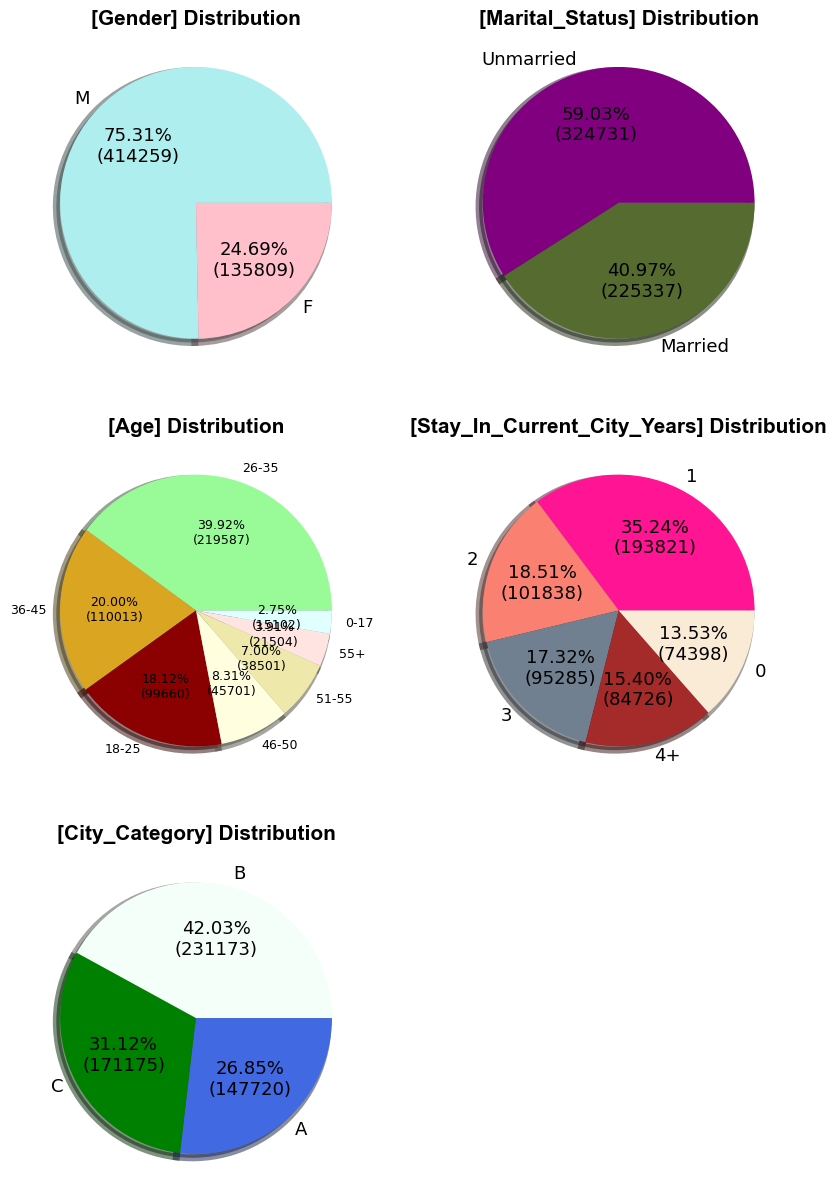

In [17]:
import random, matplotlib.colors as mcolors
#setting the plot style
fig = plt.figure(figsize = (10,15))
# fig = plt.figure(figsize = (15,12))
gs = fig.add_gridspec(3,2)
#///////Creating pie chart for ['Gender'] disribution
ax0 = fig.add_subplot(gs[0,0])
#Function to Get Count of the Attribute & Percentage in PieChart DataLabel
gend = df['Gender'].value_counts().values.sum()
def fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, gend*x/100)
#ax0.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%',
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 100)
ax0.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = fmt,
        shadow = True,colors=colors,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})
#setting title for visual
ax0.set_title('[Gender] Distribution',{'font':'Arial', 'size':15,'weight':'bold'})
#///////Creating pie chart for ['MaritalStatus']
ax1 = fig.add_subplot(gs[0,1])
mstaus = df['Marital_Status'].value_counts().values.sum()
def fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, mstaus*x/100)
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 100)
ax1.pie(df['Marital_Status'].value_counts().values,labels = df['Marital_Status'].value_counts().index,autopct = fmt,
        shadow = True,colors = colors,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})
ax1.set_title('[Marital_Status] Distribution',{'font':'Arial', 'size':15,'weight':'bold'})
#///////Creating pie chart for ['Age']
age = df['Age'].value_counts().values.sum()
def fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, age*x/100)
ax2 = fig.add_subplot(gs[1,0])
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 100)
ax2.pie(df['Age'].value_counts().values,labels = df['Age'].value_counts().index,autopct = fmt,
        shadow = True,colors = colors,wedgeprops = {'linewidth': 5},textprops={'fontsize': 9, 'color': 'black'})
ax2.set_title('[Age] Distribution',{'font':'Arial', 'size':15,'weight':'bold'})
#### Creating pie chart for ['Stay_In_Current_City_Years']
sccy = df['Stay_In_Current_City_Years'].value_counts().values.sum()
def fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, sccy*x/100)
ax3 = fig.add_subplot(gs[1,1])
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 100)
ax3.pie(df['Stay_In_Current_City_Years'].value_counts().values,labels = df['Stay_In_Current_City_Years'].value_counts().index,autopct = fmt,
        shadow = True,colors = colors,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})
ax3.set_title('[Stay_In_Current_City_Years] Distribution',{'font':'Arial', 'size':15,'weight':'bold'})
#### Creating pie chart for ['City_Category']
citicat = df['City_Category'].value_counts().values.sum()
def fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, citicat*x/100)
ax4 = fig.add_subplot(gs[2,0])
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 100)
ax4.pie(df['City_Category'].value_counts().values,labels = df['City_Category'].value_counts().index,autopct = fmt,
        shadow = True,colors = colors,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})
ax4.set_title('[City_Category] Distribution',{'font':'Arial', 'size':15,'weight':'bold'})
plt.show()

##### >> The majority of purchases in the given data set are made by males as compared to females.
##### >> Males constitute 75.31% of the user base, with the remaining being females.
##### >> Married customers make up 40.97% of the total, with the rest being unmarried.
##### >> The age group of 26-35 accounts for 39.92% of customers, followed by the 36-45 age group at 20%, and the 18-25 age group at 18.12%.
##### >> 32.72% of customers have been residing in their current city for over 3 years, while 18.51% have been there for 2 years.
##### >> 42% of customers live in Category B cities, followed by 31.12% in Category C cities, and the remaining 26.85% in Category A cities.

### Outliers Detection using BoxPlots on Numerical columns

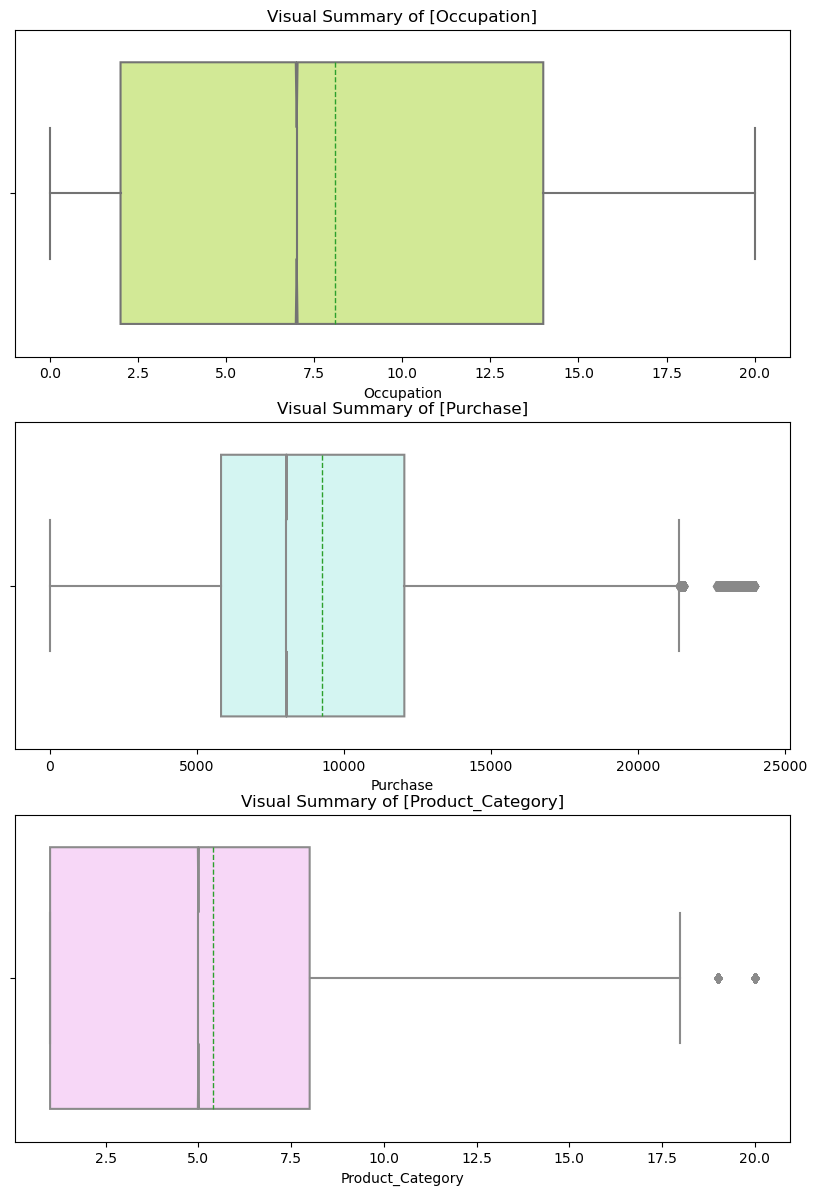

In [18]:
# fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
fig, axis = plt.subplots(nrows=3, figsize=(10,8))
fig.subplots_adjust(top=1.5)
b1 = sns.boxplot(data=df, x="Occupation", orient='h', ax=axis[0],color="#d8f788",meanline=True,showmeans=True,notch=True)
b1.set_title("Visual Summary of [Occupation]")
b2 = sns.boxplot(data=df, x="Purchase", orient='h', ax=axis[1],color="#cffaf6",meanline=True,showmeans=True,notch=True)
b2.set_title("Visual Summary of [Purchase]")
b3 = sns.boxplot(data=df, x="Product_Category", orient='h', ax=axis[2],color="#fcd2fc",meanline=True,showmeans=True,notch=True)
b3.set_title("Visual Summary of [Product_Category]")
plt.show()

#### The plots suggest that there are minimal outliers in the Product Category.
#### There are more outliers observed in the Purchase value and No outlier persist in Occupation attribute.

In [19]:
print('Purchase Amount [Mean]   = ',df["Purchase"].mean())
print('Purchase Amount [Median] = ',df["Purchase"].median())

Purchase Amount [Mean]   =  9263.968712959126
Purchase Amount [Median] =  8047.0


#### A notable difference between the Mean and Median of Purchase Amounts suggests the existence of outliers.

### Identifying the number of outliers in Purchase values using the quantile function in pandas

In [20]:
q1 = df["Purchase"].quantile(0.25)
q3 = df["Purchase"].quantile(0.75)
IQR = q3-q1
outliers = df["Purchase"][((df["Purchase"]<(q1-1.5*IQR)) | (df["Purchase"]>(q3+1.5*IQR)))]
print("No. of outliers: "+ str(len(outliers)))
print("Maximum Outlier Value:"+ str(outliers.max()))
print("Minimum Outlier value: "+ str(outliers.min()))

No. of outliers: 2677
Maximum Outlier Value:23961
Minimum Outlier value: 21401


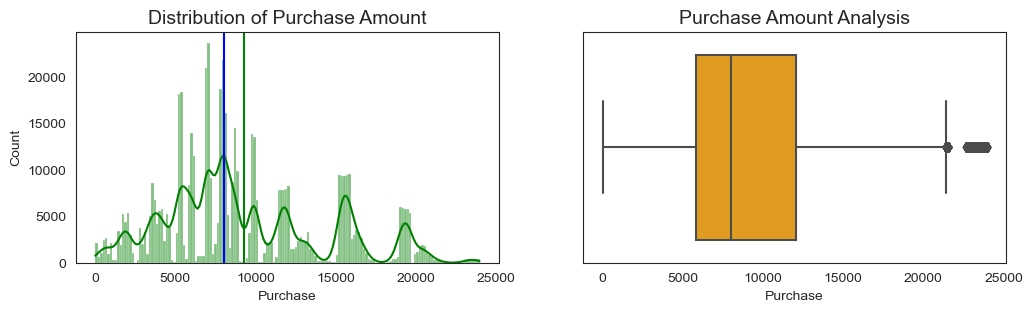

In [21]:
fig = plt.figure(figsize=(12,3))
sns.set_style("white")
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Purchase", kde=True, color = 'green')
plt.title("Distribution of Purchase Amount", fontsize = '14')
plt.axvline(df["Purchase"].mean(),color="g")
plt.axvline(df["Purchase"].median(),color="b")
plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = "Purchase", orient = "h",color="Orange")
plt.title('Purchase Amount Analysis', fontsize = '14')
plt.show()

#### >> Outliers exist in the purchase amount.
#### >> The distribution of the purchase amount, as seen in the density plot, is predominantly on the left side, indicating a right skew.
#### >> Most customers tend to purchase within a range of 5,000 to 20,000.

### Histogram with KDE is used to visualize the count distribution across various attributes.

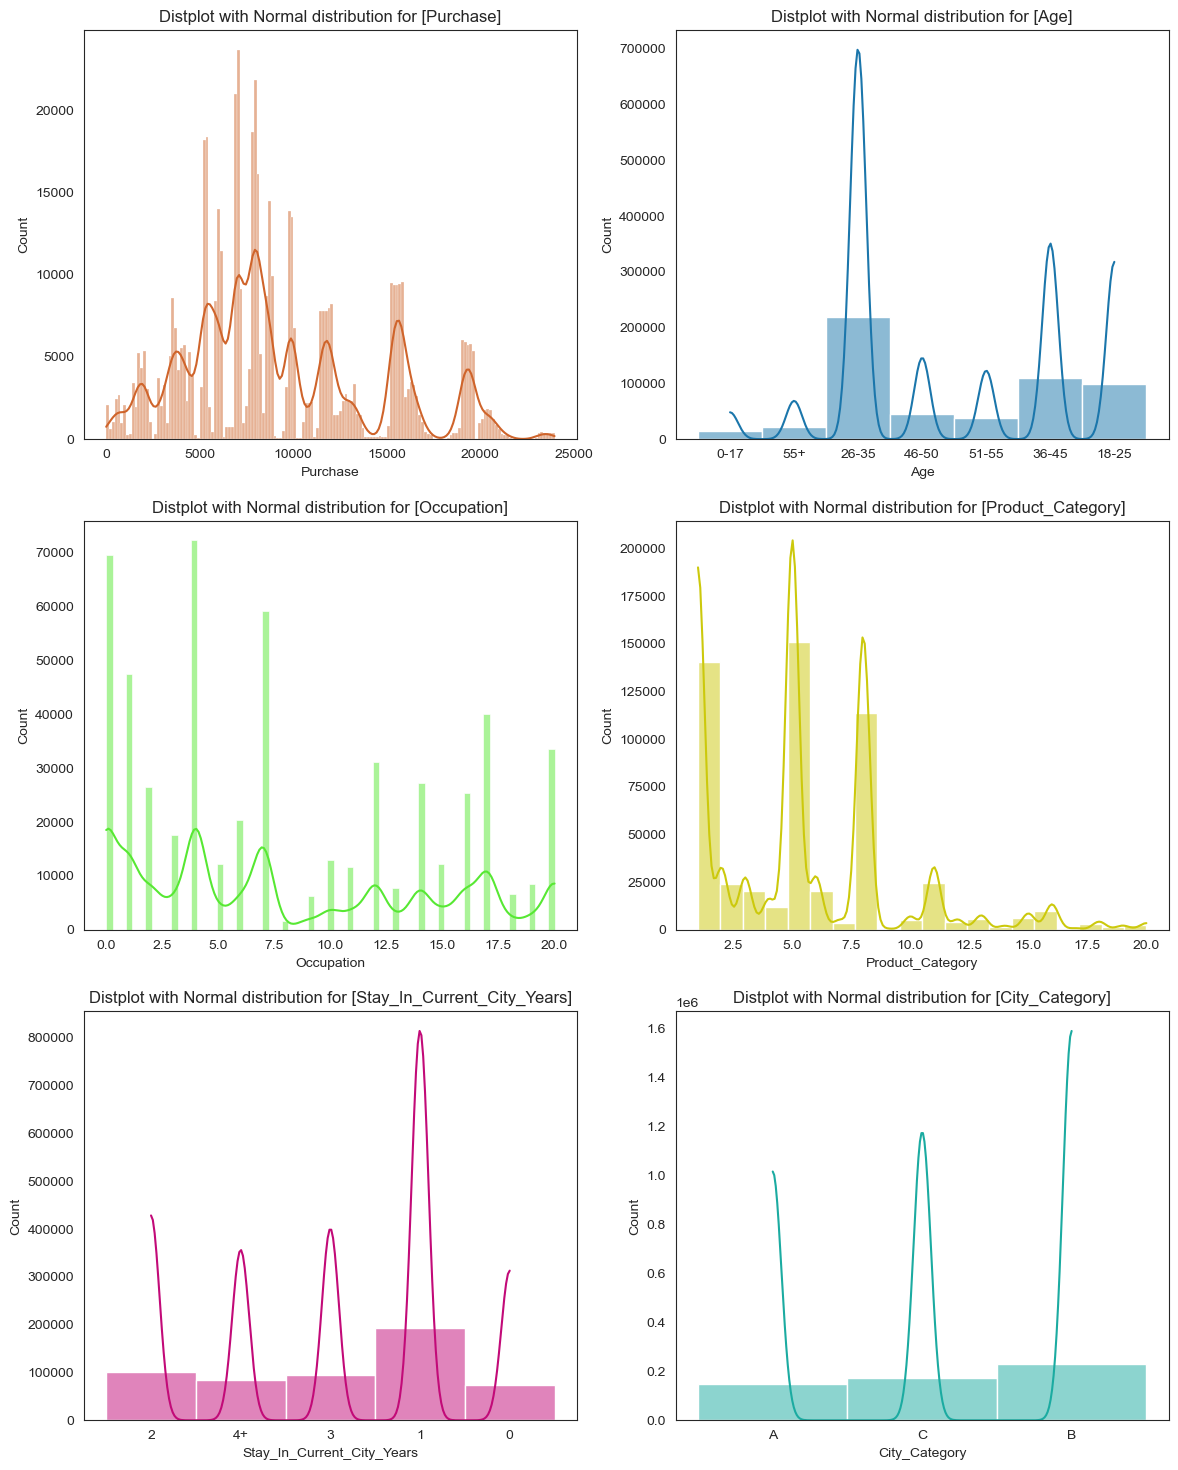

In [22]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
fig.subplots_adjust(top=1.5)
g1 = sns.histplot(data=df, x="Purchase", kde=True, ax=axis[0,0],color="#cf642b")
g1.set_title("Distplot with Normal distribution for [Purchase]")
g2 = sns.histplot(data=df, x="Age", kde=True, ax=axis[0,1],color="#1b76ab")
g2.set_title("Distplot with Normal distribution for [Age]")
g2 = sns.histplot(data=df, x="Occupation", kde=True, ax=axis[1,0],color="#57e833")
g2.set_title("Distplot with Normal distribution for [Occupation]")
g4 = sns.histplot(data=df, x="Product_Category", kde=True, ax=axis[1,1],color="#ccc90c",bins=20)
g4.set_title("Distplot with Normal distribution for [Product_Category]")
g5 = sns.histplot(data=df, x="Stay_In_Current_City_Years", kde=True, ax=axis[2,0],color="#c20a78")
g5.set_title("Distplot with Normal distribution for [Stay_In_Current_City_Years]")
g6 = sns.histplot(data=df, x="City_Category", kde=True, ax=axis[2,1],color="#1baba1",bins=20)
g6.set_title("Distplot with Normal distribution for [City_Category]")
plt.show()

#### >> The plots reveal that the income range for the majority of individuals lies between 5000 and 15000.
#### >> The age brackets with the most customers are 26-35, 36-45, and 18-25.
#### >>The occupation levels are varied and do not adhere to a normal distribution.
#### >> Products numbered between 2 and 8 are the most popular among customers.
#### >> City B has the highest customer base, followed by Cities C and A.
#### >> Customers who have been residing in their current city for 1 year outnumber those with other tenures.

## Bivariate & Multivariate Analysis

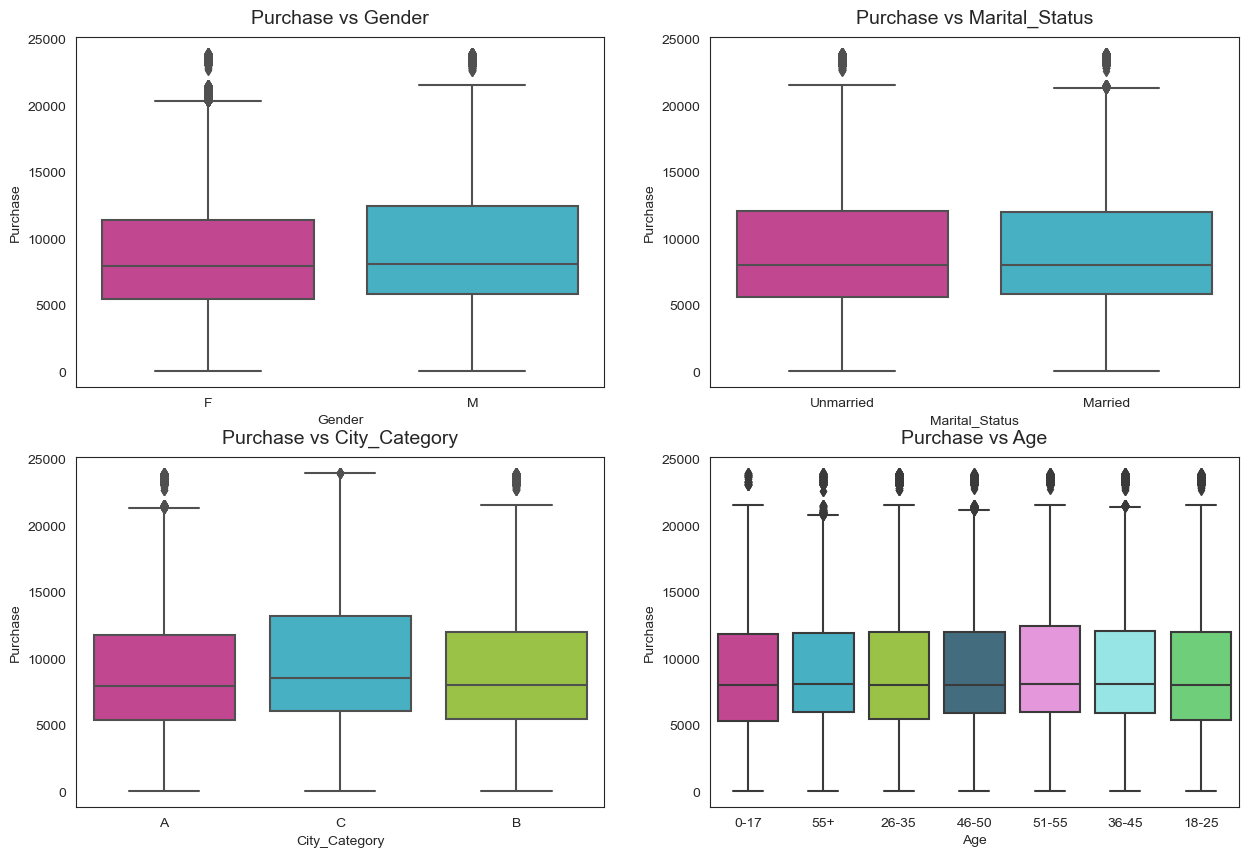

In [23]:
cat_col = ["Gender", "Marital_Status", "City_Category", "Age"]

fig, axs = plt.subplots(nrows=2, ncols = 2, figsize=(15,10))
k = 0
# sns.set_style("dark")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df, x=cat_col[k], y="Purchase",
                    palette =["#d63395","#33bed6","#a0d633","#3A7089","#f28ae6","#8af2f1","#5fde6c","#3A7089"], 
                    ax=axs[i, j])
        axs[i, j].set_title("Purchase vs " + cat_col[k], pad = 10, fontsize = 14)
        k += 1
plt.show()


#### The purchasing behavior of customers remains largely balanced and unaffected by factors such as Gender, Marital Status, City Category, and Age.
#### The median purchase value is nearly identical across all these features.

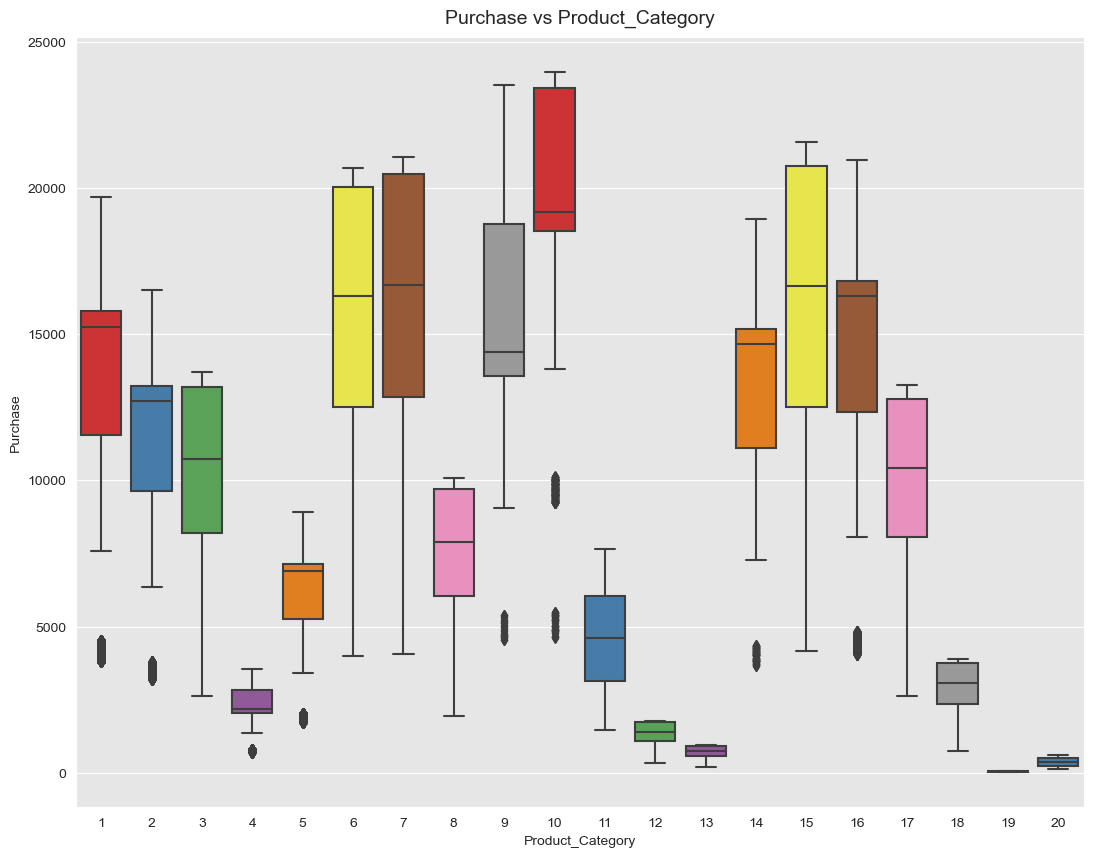

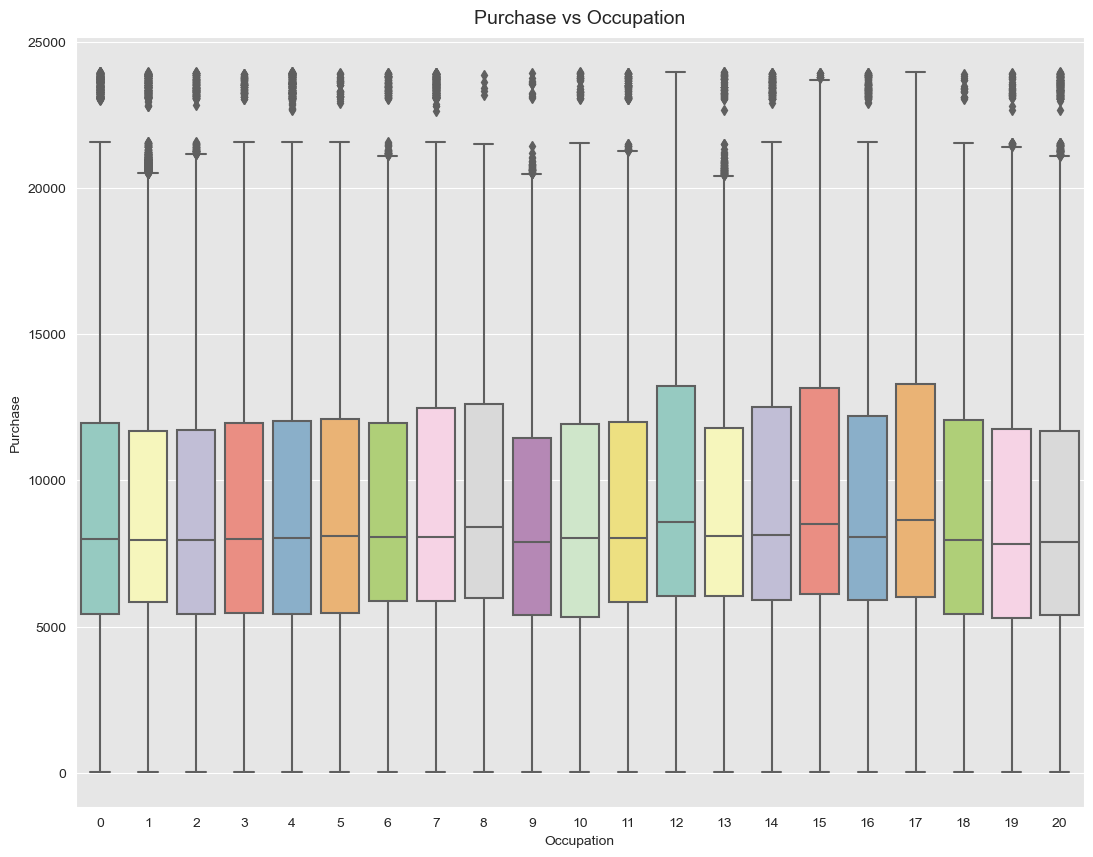

In [24]:
attrs = ["Occupation","Product_Category"]
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(13, 10))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set1').set_title("Purchase vs " + attrs[-1], pad = 10, fontsize = 14)
plt.show()
plt.figure(figsize=(13, 10))
sns.boxplot(data=df, y='Purchase', x=attrs[-2], palette='Set3').set_title("Purchase vs " + attrs[-2], pad = 10, fontsize = 14)
plt.show()

#### Product categories 6, 7, 10, 15, and 16 register the highest values in purchases, while product categories 4, 5, 8, 11, 12, and 18 record lower values in purchases.
#### The median purchase value is nearly identical across all these Occupation types.

## Correlation Analysis

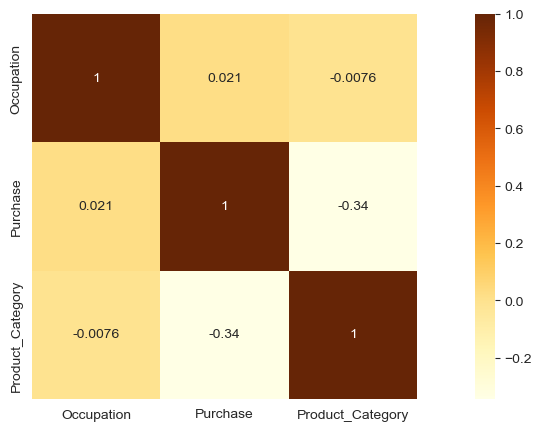

In [25]:
plt.figure(figsize = (15, 5))
sns.heatmap(data=df2.corr(), annot=True, cmap="YlOrBr", square=True)
plt.show()

#### Given the high concentration of categorical variables in our dataset, it’s challenging to discern any correlations.

## Multivariate Analysis

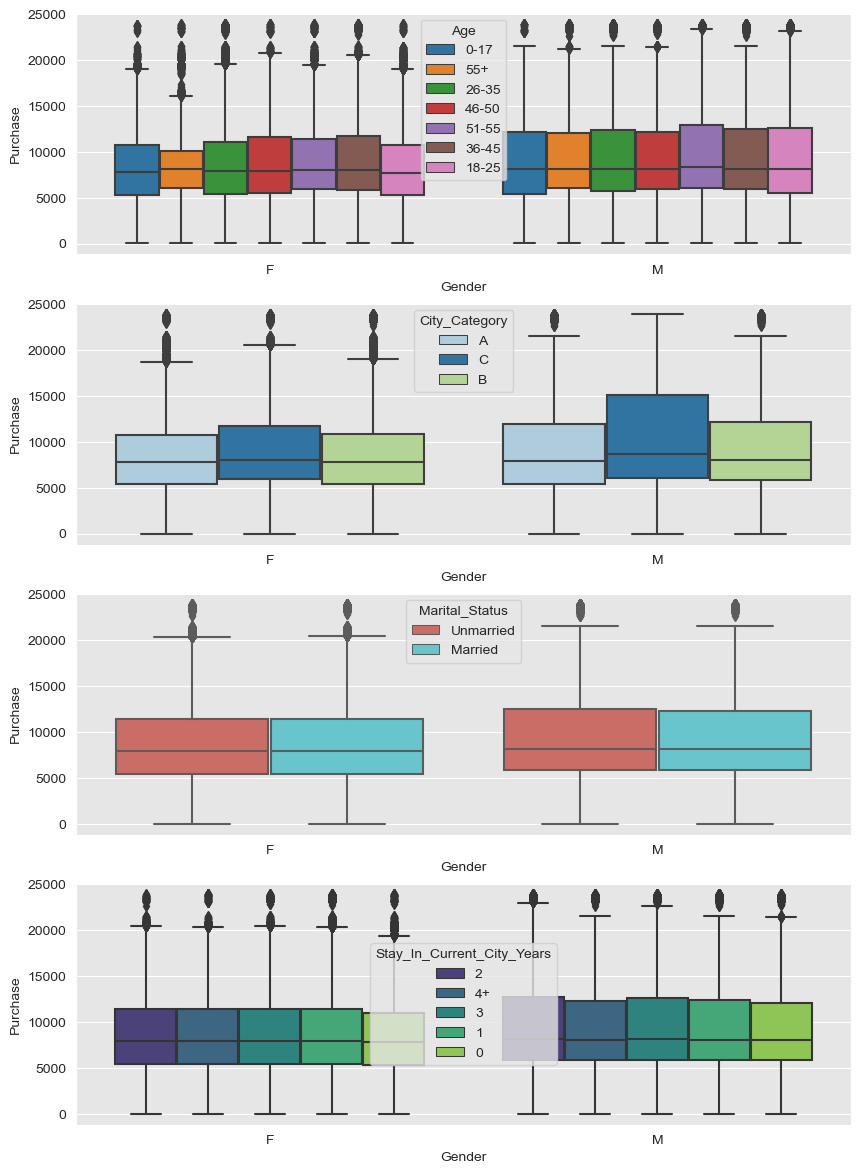

In [26]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))
fig.subplots_adjust(top=1.5)
sns.color_palette("tab10")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='tab10', ax=axs[0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette="Paired", ax=axs[1])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette="hls", ax=axs[2])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette="viridis", ax=axs[3])
# axs[1,1].legend(loc='upper left')
plt.show()

#### >> Among all the variables analyzed, it’s significant to observe that the purchase amount remains fairly consistent, irrespective of the variable being considered. 
#### >> The data suggests that the median purchase amount persistently stays around 8,000 USD, no matter which specific variable is being analyzed.
#### >> Males purchased more compared to females.

## Answering questions

### Are women spending more money per transaction than men? Why or Why not? 

In [27]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [28]:
# Gender wise value counts in amt_df
amt_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [29]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()
print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


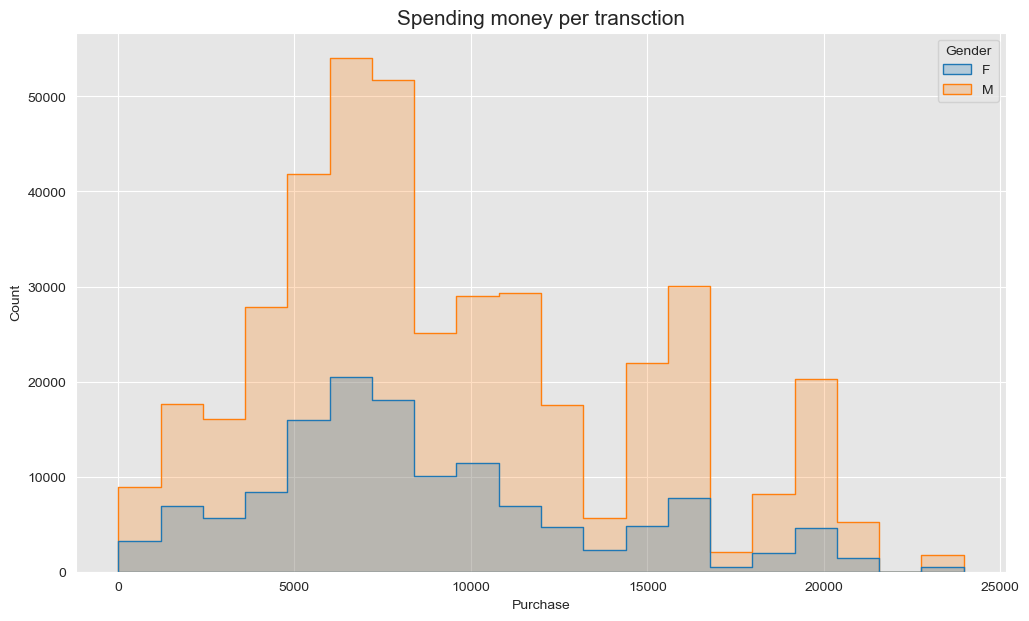

In [30]:
plt.figure(figsize=(12, 7))
plt.title("Spending money per transction", fontsize = 15)
sns.histplot(data=df, x = "Purchase", bins=20, hue = "Gender", element="step")
plt.show()

#### As seen above, the purchase amount for both the genders is not normally distributed

In [31]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [32]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 3000
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

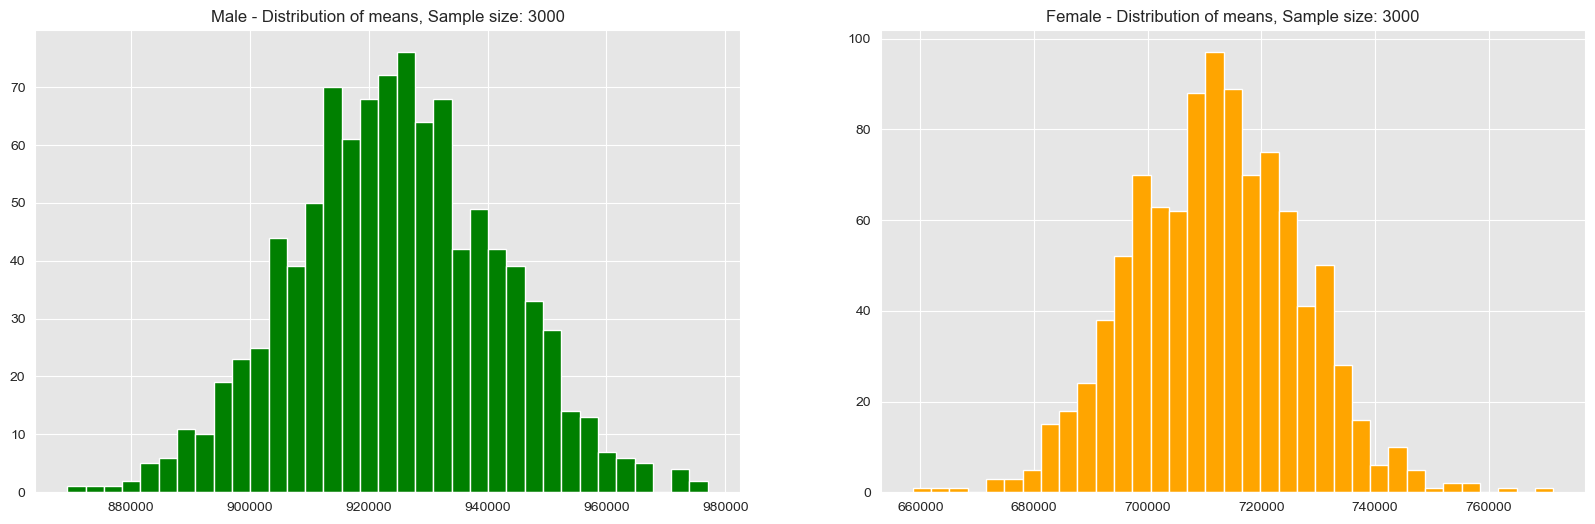

In [33]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(male_means, color='green',bins=35)
axis[1].hist(female_means,color="orange", bins=35)
axis[0].set_title(f"Male - Distribution of means, Sample size: {male_sample_size}")
axis[1].set_title(f"Female - Distribution of means, Sample size: {female_sample_size}")
plt.show()

In [34]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 924566.98
Population mean - Mean of sample means of amount spend for Female: 711954.32

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


#### Based on the Central Limit Theorem applied to our population, we can observe that the transactional expenditure by female customers is notably lower than their male counterparts.
##### Average amount spend by male customers is 9.25,344
##### Average amount spend by female customers is 7,12,024

## Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [35]:
#creating a function to calculate confidence interval

def confidence_interval(data,ci):
    #converting the list to series
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2
    
    #calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[l_ci,u_ci]).round(0)
    
    return interval

In [36]:
#defining a function for plotting the visual for given confidence interval
def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames for each gender
    df_male = df.loc[df['Gender'] == 'M','Purchase']
    df_female = df.loc[df['Gender'] == 'F','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    male_samples = {}
    female_samples = {}
    
    for i,x,y in sample_sizes:
        male_means = [] #list for collecting the means of male sample
        female_means = [] #list for collecting the means of female sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            male_bootstrapped_samples = np.random.choice(df_male,size = i)
            female_bootstrapped_samples = np.random.choice(df_female,size = i)

            #calculating mean of those samples
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            #appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)
            
        #storing the above sample generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})

                                    #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])
        
        #plots for male and female
        sns.kdeplot(data = temp_df,x = 'male_means',color ="#1baba1" ,fill = True, alpha = 0.5,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_df,x = 'female_means',color ="#c20a78" ,fill = True, alpha = 0.5,ax = ax,label = 'Female')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(male_means,ci)
        f_range = confidence_interval(female_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#1baba1",linestyle = '--')
        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="#c20a78",linestyle = '--')

        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)
        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')
        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})
        plt.legend()
    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()
    
    return male_samples,female_samples

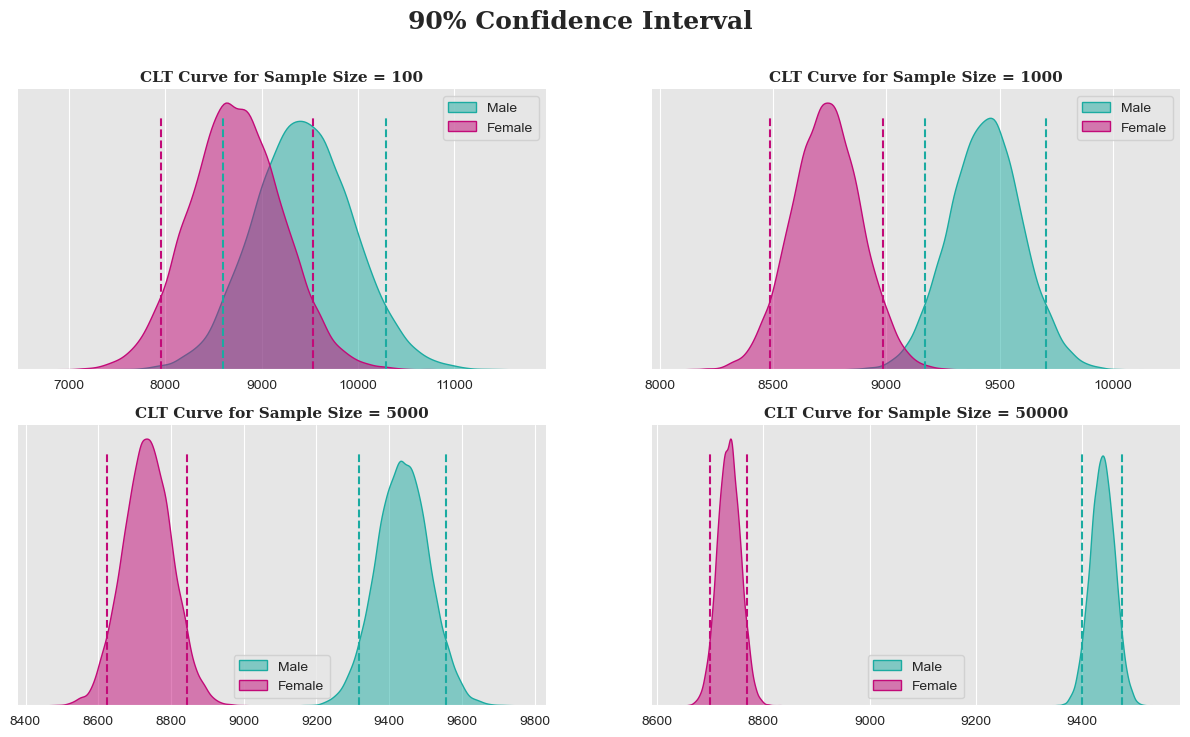

In [37]:
m_samp_90,f_samp_90 = plot(90)

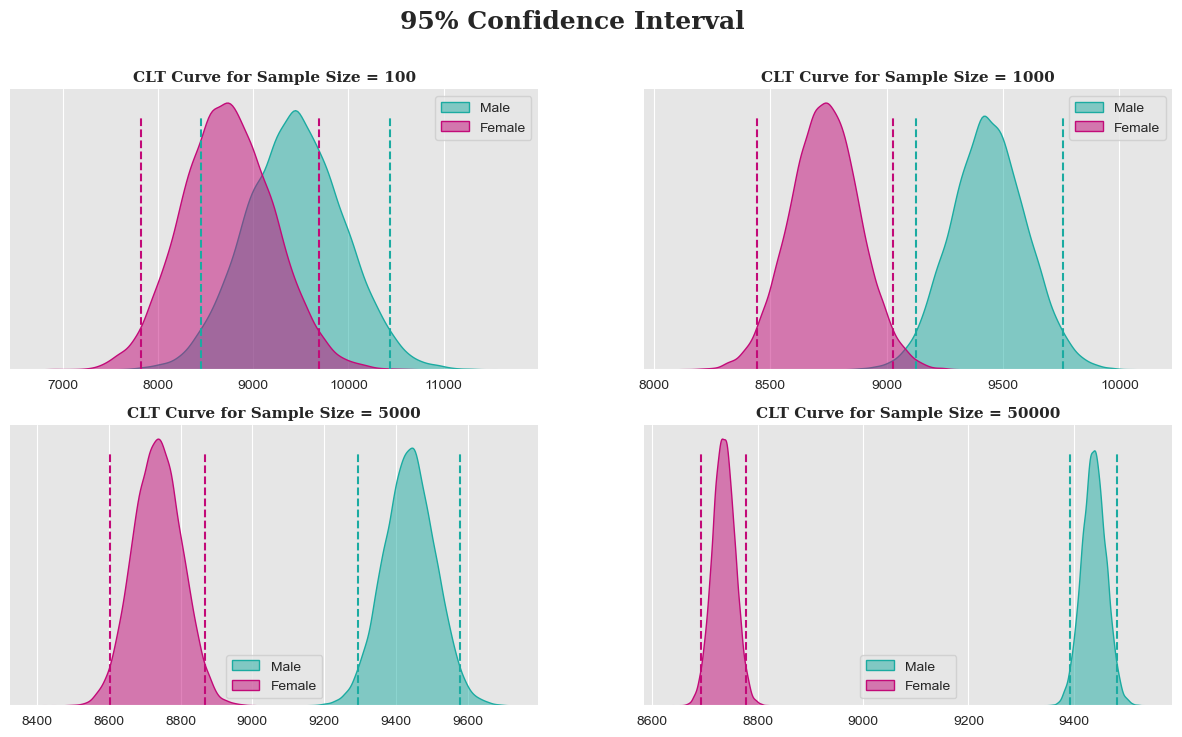

In [38]:
m_samp_95,f_samp_95 = plot(95)

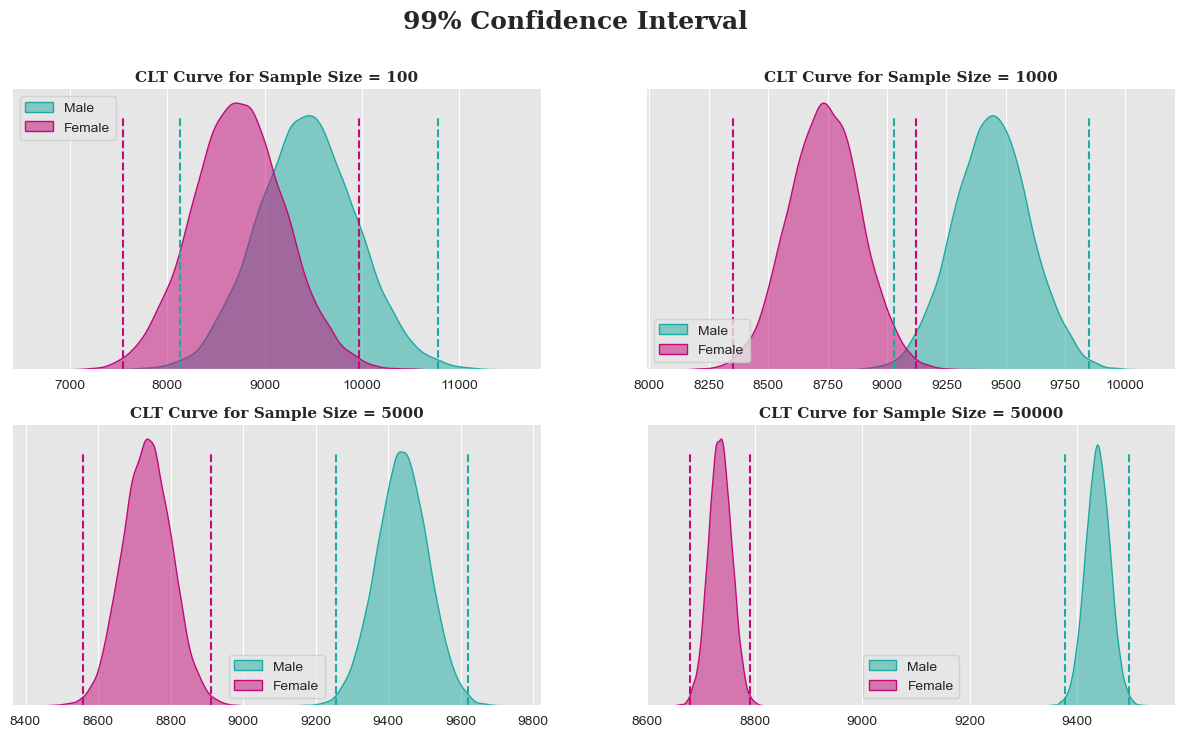

In [39]:
m_samp_99,f_samp_99 = plot(99)

## Are confidence intervals of average male and female spending overlapping?

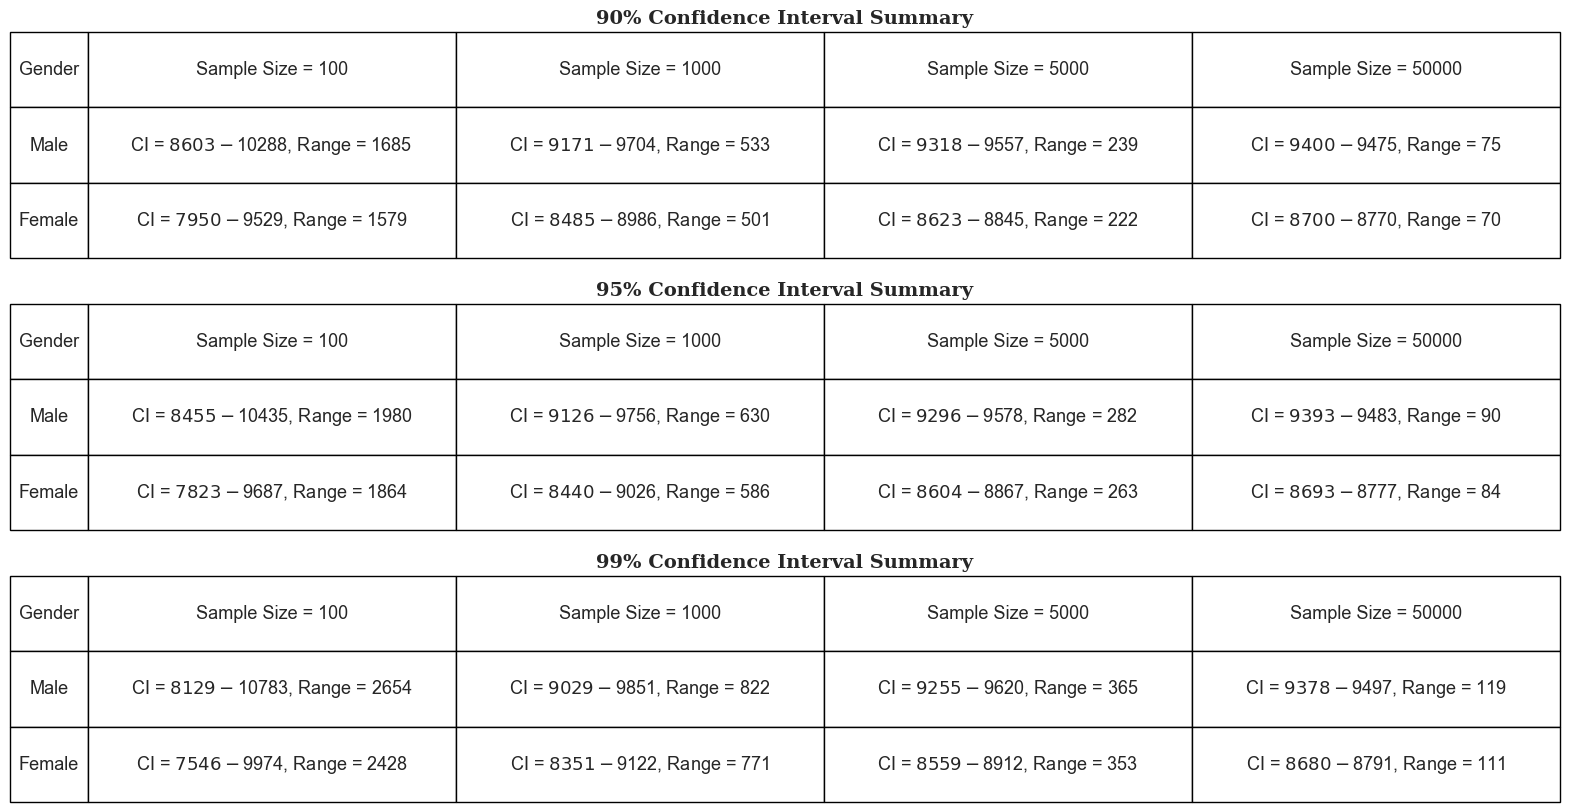

In [40]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(m_samp_90,f_samp_90,90,0),(m_samp_95,f_samp_95,95,1),(m_samp_99,f_samp_99,99,2)]:
    #list for collecting ci for given cl
    m_ci = ['Male'] 
    f_ci = ['Female'] 
    
    #finding ci for each sample size (males)
    for m in i:  
        m_range = confidence_interval(i[m],k)
        m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")
        
    #finding ci for each sample size (females)
    for f in j:  
        f_range = confidence_interval(j[f],k)
        f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")
    
                                        #plotting the summary
    ax = fig.add_subplot(gs[l])
    
    #contents of the table
    ci_info = [m_ci,f_ci]
    
    #plotting the table
    table = ax.table(cellText = ci_info, cellLoc='center',
                     colLabels =['Gender','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
                     colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])

    table.set_fontsize(13)

    #removing axis 
    ax.axis('off')
    
    #setting title
    ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

#### Sample Size:
##### The study underscores the significance of sample size when determining population parameters. It indicates that as the sample size expands, the confidence intervals become more precise and less wide. In a business context, this suggests that larger samples can yield more dependable insights and estimates.

#### Confidence Intervals:
##### Based on the analysis, it is observed that the confidence intervals do not overlap as the sample size grows, except for the sample size of 100. This implies a statistically meaningful difference in the average transaction spending between men and women in the given samples.

#### Population Average:
##### We have 95% confidence that the actual average for males lies between 9,393 and 9,483, and for females, it is between 8,692 and 8,777.

#### Women’s Spending:
##### On average, men appear to spend more per transaction than women, as evidenced by the consistently higher upper bounds of the confidence intervals for men across various sample sizes.

## Results when the same activity is performed for Married vs Unmarried

In [41]:
#creating a df for purchase amount vs marital status
MaritalSts = df.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()
#calculating the amount in billions
MaritalSts['sum_in_billions'] = round(MaritalSts['sum'] / 10**9,2)
#calculationg percentage distribution of purchase amount
MaritalSts['%sum'] = round(MaritalSts['sum']/MaritalSts['sum'].sum(),3)
#calculationg per purchase amount
MaritalSts['per_purchase'] = round(MaritalSts['sum']/MaritalSts['count'])
MaritalSts

,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,Married,2086885295,225337,2.09,0.41,9261.0
1,Unmarried,3008927447,324731,3.01,0.59,9266.0


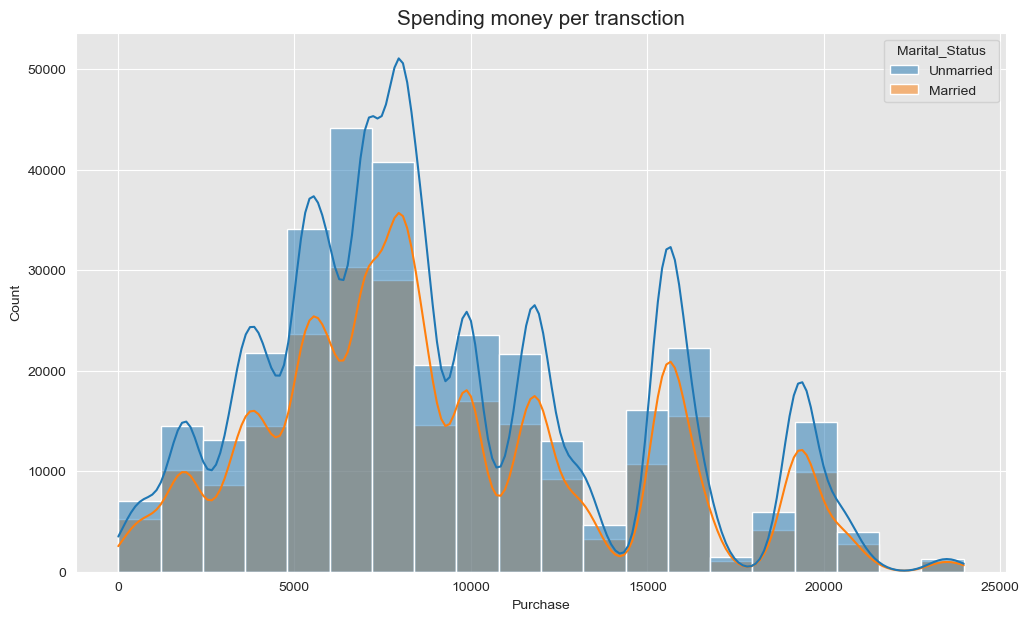

In [42]:
plt.figure(figsize=(12, 7))
plt.title("Spending money per transction", fontsize = 15)
sns.histplot(data=df, x = "Purchase", bins=20, hue = "Marital_Status",kde=True)
plt.show()

#### The total purchase amount and number of transactions by Unmarried customers was more than 20% the amount and transactions by married customers indicating that they had a more significant impact on the Black Friday sales.
#### The average purchase amount per transaction was almost similar for married and unmarried customers (9261 vs 9266).
#### As seen above, the purchase amount for both married and unmarried customers is not normally distributed.

In [43]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames 
    df_married = df.loc[df['Marital_Status'] == 'Married','Purchase']
    df_unmarried = df.loc[df['Marital_Status'] == 'Unmarried','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    married_samples = {}
    unmarried_samples = {}
    
    for i,x,y in sample_sizes:
        married_means = [] #list for collecting the means of married sample
        unmarried_means = [] #list for collecting the means of unmarried sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            married_bootstrapped_samples = np.random.choice(df_married,size = i)
            unmarried_bootstrapped_samples = np.random.choice(df_unmarried,size = i)

            #calculating mean of those samples
            married_sample_mean = np.mean(married_bootstrapped_samples)
            unmarried_sample_mean = np.mean(unmarried_bootstrapped_samples)

            #appending the mean to the list
            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)
            
        #storing the above sample generated
        married_samples[f'{ci}%_{i}'] = married_means
        unmarried_samples[f'{ci}%_{i}'] = unmarried_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'married_means':married_means,'unmarried_means':unmarried_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])
        
        #plots for married and unmarried
        sns.kdeplot(data = temp_df,x = 'married_means',color ="#5fde6c" ,fill = True, alpha = 0.5,ax = ax,label = 'Married')
        sns.kdeplot(data = temp_df,x = 'unmarried_means',color ="#d6ce33" ,fill = True, alpha = 0.5,ax = ax,label = 'Unmarried')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(married_means,ci)
        u_range = confidence_interval(unmarried_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#5fde6c",linestyle = '--')

        for k in u_range:
            ax.axvline(x = k,ymax = 0.9, color ="#d6ce33",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()
    
    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()
    
    return married_samples,unmarried_samples

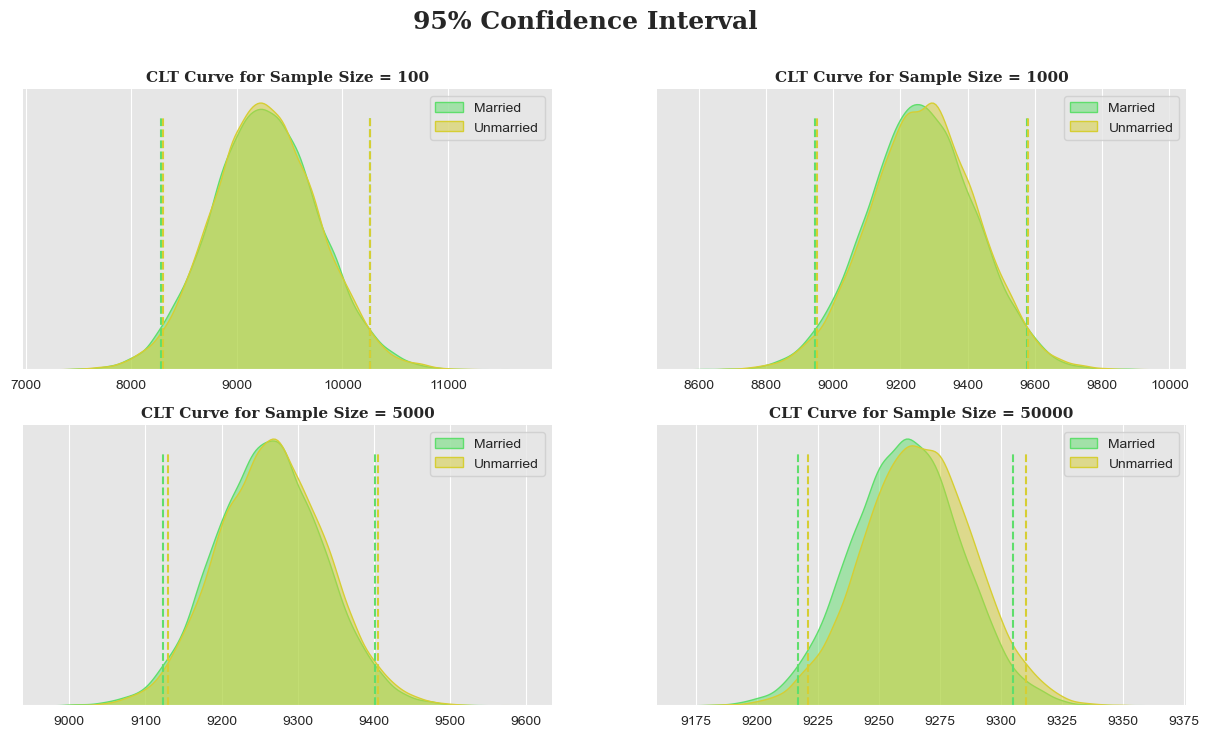

In [44]:
m_samp_95,u_samp_95 = plot(95)

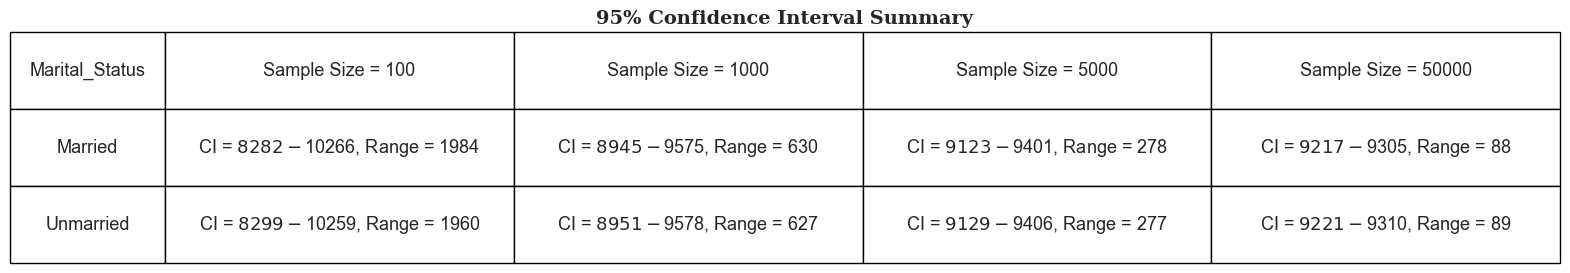

In [45]:
#setting the plot style
fig,ax = plt.subplots(figsize = (20,3))

#list for collecting ci for given cl
m_ci = ['Married'] 
u_ci = ['Unmarried'] 

#finding ci for each sample size (married)
for m in m_samp_95:  
    m_range = confidence_interval(m_samp_95[m],95)
    m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

#finding ci for each sample size (unmarried)
for u in u_samp_95:  
    u_range = confidence_interval(u_samp_95[u],95)
    u_ci.append(f"CI = ${u_range[0]:.0f} - ${u_range[1]:.0f}, Range = {(u_range[1] - u_range[0]):.0f}")

                                    #plotting the summary
#contents of the table
ci_info = [m_ci,u_ci]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Marital_Status','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis 
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

#### Sample Size:
##### The study underscores the significance of sample size when determining population parameters. It indicates that as the sample size expands, the confidence intervals become more precise and less wide. In a business context, this suggests that larger samples can yield more dependable insights and estimates.

#### Confidence Intervals:
##### Based on the analysis, it is observed that the confidence intervals do not overlap as the sample size grows, except for the sample size of 100. This implies a statistically meaningful difference in the average transaction spending between men and women in the given samples.

#### Population Average:
##### We have 95% confidence that the actual average for males lies between 9,217 and 9,305, and for females, it is between 9,221 and 9310.

#### Women’s Spending:
##### On average, men appear to spend more per transaction than women, as evidenced by the consistently higher upper bounds of the confidence intervals for men across various sample sizes.

## Results when the same activity is performed for Age

In [46]:
#creating a df for purchase amount vs age group
Agedf = df.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()
#calculating the amount in billions
Agedf['sum_in_billions'] = round(Agedf['sum'] / 10**9,2)
#calculationg percentage distribution of purchase amount
Agedf['%sum'] = round(Agedf['sum']/Agedf['sum'].sum(),3)
#calculationg per purchase amount
Agedf['per_purchase'] = round(Agedf['sum']/Agedf['count'])
Agedf

,Age,sum,count,sum_in_billions,%sum,per_purchase
0,0-17,134913183,15102,0.13,0.026,8933.0
1,18-25,913848675,99660,0.91,0.179,9170.0
2,26-35,2031770578,219587,2.03,0.399,9253.0
3,36-45,1026569884,110013,1.03,0.201,9331.0
4,46-50,420843403,45701,0.42,0.083,9209.0
5,51-55,367099644,38501,0.37,0.072,9535.0
6,55+,200767375,21504,0.20,0.039,9336.0


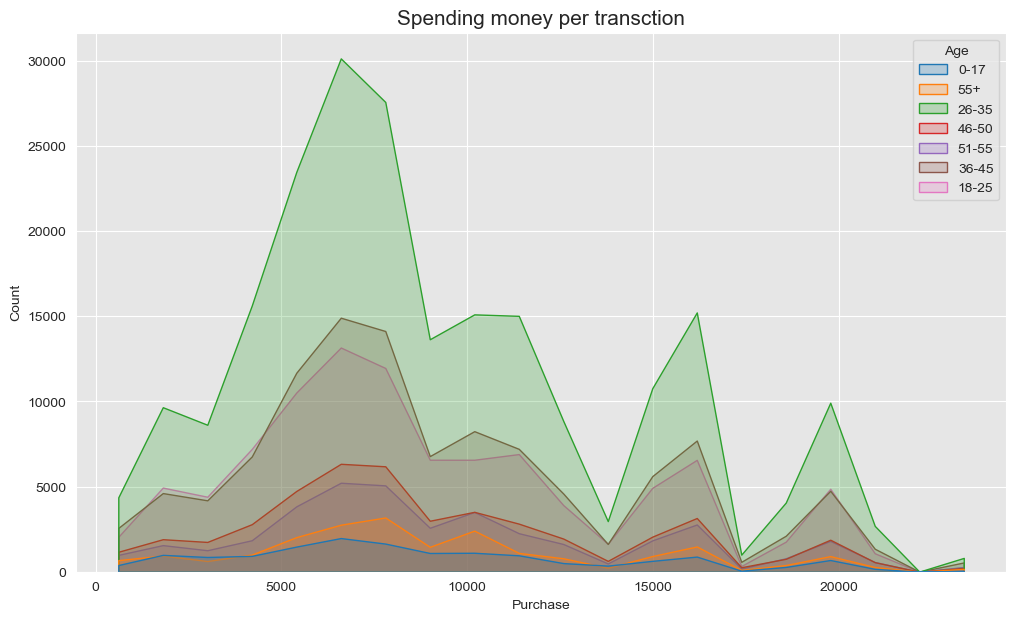

In [47]:
plt.figure(figsize=(12, 7))
plt.title("Spending money per transction", fontsize = 15)
sns.histplot(data=df, x = "Purchase", bins=20, hue = "Age", element="poly")
plt.show()

#### As seen above, the purchase amount for all age groups is not normally distributed.

In [48]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):
    #setting the plot style
    fig = plt.figure(figsize = (15,15))
    gs = fig.add_gridspec(4,1)

    #creating separate data frames 
    
    df_1 = df.loc[df['Age'] == '0-17','Purchase']
    df_2 = df.loc[df['Age'] == '18-25','Purchase']
    df_3 = df.loc[df['Age'] == '26-35','Purchase']
    df_4 = df.loc[df['Age'] == '36-45','Purchase']
    df_5 = df.loc[df['Age'] == '46-50','Purchase']
    df_6 = df.loc[df['Age'] == '51-55','Purchase']
    df_7 = df.loc[df['Age'] == '55+','Purchase']
    
    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0),(1000,1),(5000,2),(50000,3)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    samples1,samples2,samples3,samples4,samples5,samples6,samples7 = {},{},{},{},{},{},{}
    
    for i,x in sample_sizes:
        l1,l2,l3,l4,l5,l6,l7 = [],[],[],[],[],[],[]

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            bootstrapped_samples_1 = np.random.choice(df_1,size = i)
            bootstrapped_samples_2 = np.random.choice(df_2,size = i)
            bootstrapped_samples_3 = np.random.choice(df_3,size = i)
            bootstrapped_samples_4 = np.random.choice(df_4,size = i)
            bootstrapped_samples_5 = np.random.choice(df_5,size = i)
            bootstrapped_samples_6 = np.random.choice(df_6,size = i)
            bootstrapped_samples_7 = np.random.choice(df_7,size = i)

            #calculating mean of those samples
            sample_mean_1 = np.mean(bootstrapped_samples_1)
            sample_mean_2 = np.mean(bootstrapped_samples_2)
            sample_mean_3 = np.mean(bootstrapped_samples_3)
            sample_mean_4 = np.mean(bootstrapped_samples_4)
            sample_mean_5 = np.mean(bootstrapped_samples_5)
            sample_mean_6 = np.mean(bootstrapped_samples_6)
            sample_mean_7 = np.mean(bootstrapped_samples_7)
            
            #appending the mean to the list
            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)
            l6.append(sample_mean_6)
            l7.append(sample_mean_7)

        #storing the above sample generated
        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5
        samples6[f'{ci}%_{i}'] = l6
        samples7[f'{ci}%_{i}'] = l7

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'0-17':l1,'18-25':l2,'26-35':l3,'36-45':l4,'46-50':l5,'51-55':l6,'55+':l7})
                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x])
        
        #plots
        for p,q in [('#673389', '0-17'),('#b3bd42', '18-25'),('#59bf52', '26-35'),('#5C8374', '36-45'),('#6F7597', '46-50'),
                 ('#41aba9', '51-55'),('#d8f788', '55+')]:
            
            sns.kdeplot(data = temp_df,x = q,color =p ,fill = True, alpha = 0.5,ax = ax,label = q)

        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()
    
    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()
    
    return samples1,samples2,samples3,samples4,samples5,samples6,samples7

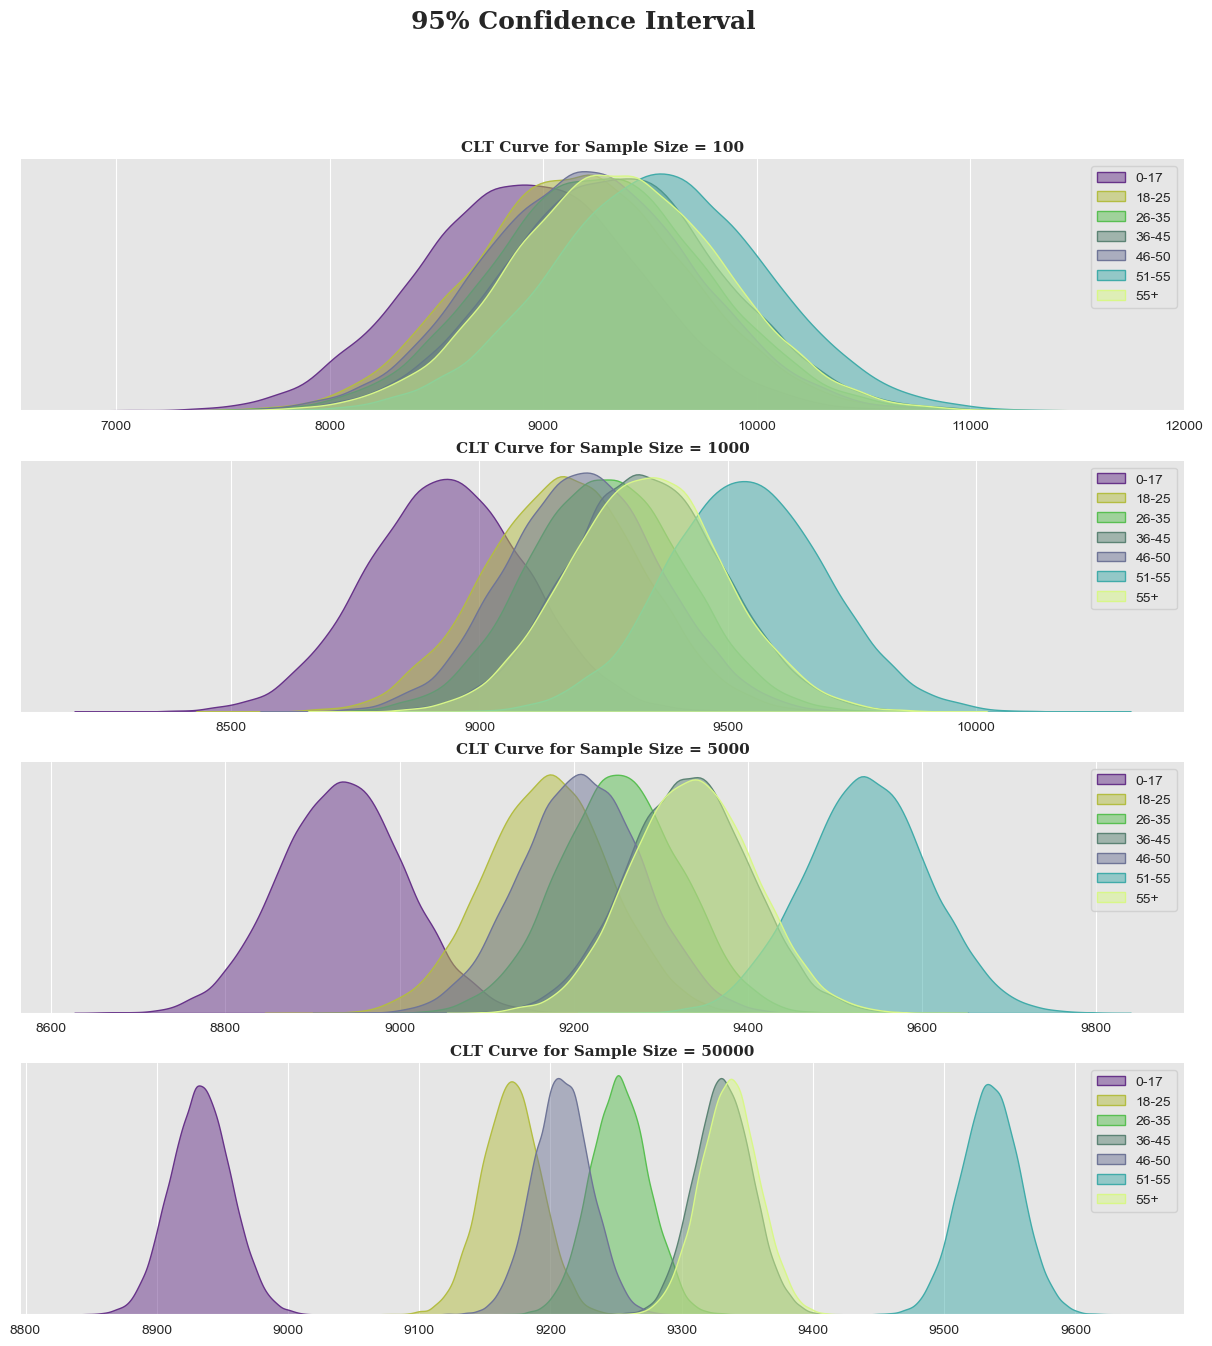

In [49]:
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

### Are confidence intervals of customer's age-group spending overlapping?

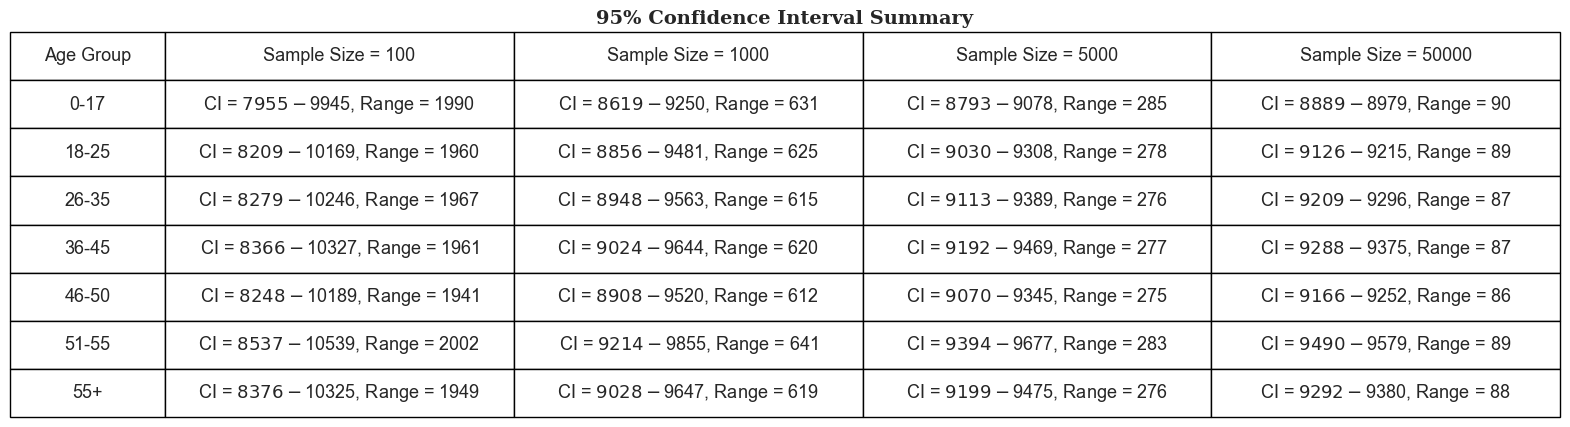

In [50]:
#setting the plot style
fig,ax = plt.subplots(figsize = (20,5))

#list for collecting ci for given cl
ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']

#finding ci for each sample size 
#samples = [samples1,samples2,samples3,samples4,samples5,samples6,samples7]

samples = [(samples1,ci_1),(samples2,ci_2),(samples3,ci_3),(samples4,ci_4),(samples5,ci_5),(samples6,ci_6),(samples7,ci_7)]

for s,c in samples:
    for i in s:
        s_range = confidence_interval(s[i],95)
        c.append(f"CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")


                                    #plotting the summary
#contents of the table
ci_info = [ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Age Group','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis 
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

#### 1. Sample Size:
##### The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
#### 2. Confidence Intervals and customer spending patterns:
##### From the above analysis, we can see that the confidence interval overlap for some of the age groups. We can club the average spending into following age groups -
##### 0 - 17 - Customers in this age group have the lowest spending per transaction
##### 18 - 25, 26 - 35, 46 - 50 - Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics
##### 36 - 45, 55+ - Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns
##### 51 - 55 - Customers in this age group have the highest spending per transaction
#### 3. Population Average:
#### We are 95% confident that the true population average for following age groups falls between the below range -
##### [0 - 17 = 8,889 to 8,979] , [18 - 25 = 9,126 to 9,213], [26 - 35 = 9,209 to 9,296], [36 - 45 = 9,288 to 9,376], [46 - 50 = 9,166 to 9,252]
##### [51 - 55 = 9,490 to 9,579] and [55+ = 9,292 to 9,380]

## Insights

### Based on the Exploratory Data Analysis (EDA):

#### >> City Category C has the highest number of customers, but City Category B sees more purchases, suggesting repeat visits from the same customers in City Category B.
#### >> In terms of city categories, City Category B represents 42% of all customer purchases, City Category C accounts for 31%, and City Category A makes up the remaining 27%. City Category C sees the highest number of purchases.
#### >> Men make more purchases than women, with 75% of purchases made by men and only 25% by women.
#### >> Product Category B is favored by the 55+ age group.
#### >> Products 5 and 8 are popular among female customers.
#### >> The age group of 26 to 35 accounts for most of our mall customers. Additionally, 60% of purchases are made by people between the ages of 26 and 45.
#### >> The majority of customer purchases fall within the 5,000 - 20,000 range.
#### >> The majority of mall customers are between the ages of 26 and 35. However, City Category C has more customers between the ages of 18 and 45.
#### >> The ratio of married to unmarried customers is 58:42.
#### >> There are slightly more female customers in City Category C.
#### >> While most of our customers are from City Category B, those from City Category C tend to spend more, with an average spending of 9719.

### In the context of the Central Limit Theorem (CLT) and Confidence Intervals (CI)

#### >> We observe an increase in overlaps with a confidence level of 95%. As the CI widens, we accommodate larger ranges where the actual population may lie, increasing the likelihood of both mean purchases falling within the same range.

#### >> The overlap between the spending of married and single customers remains apparent even as more samples are analyzed. This suggests that marital status does not affect customer spending.

#### >> For females (with a sample size of 50,000), the range for the average purchase with a 99% confidence interval is [8680, 8791].
#### >> For males, the range for the average purchase with a 99% confidence interval is [9378,9497].

#### >> For married customers (with a sample size of 50,000), the range for the average purchase with a 99% confidence interval is [9217, 9305].

#### >> For unmarried customers (with a sample size of 50,000), the range for the average purchase with a 99% confidence interval is [9221, 9310].

## Recommendations

#### >> After Black Friday, Walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This could help enhance customer retention and promote repeat business throughout the holiday season and beyond.
#### >> As the age group of 26 to 45 accounts for most sales, Walmart should tailor its offerings to meet the preferences and needs of this demographic. This could involve providing exclusive deals on products that are favored by this age group.
#### >> Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart could offer them exclusive pre-sale access, special discounts, or personalized product recommendations. Walmart could also launch loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group.
#### >> Given that customers in the 18 - 25, 26 - 35, and 46 - 50 age groups show similar purchasing behaviors, as do those in the 36 - 45 and 55+ age groups, Walmart could refine its product selection to cater to these age groups’ preferences. Walmart could also use this information to modify their pricing strategies for different age groups.
#### >> Considering the significant contribution of male customers to Black Friday sales and their tendency to spend more per transaction, it would be beneficial for Walmart to modify its marketing tactics and product selection to stimulate increased expenditure from this demographic. Simultaneously, it should ensure that products targeting female customers remain competitively priced.
#### >> Male customers living in City Category C spend more than other male customers living in Categories B or C. Selling more products in City Category C could help the company boost its revenue.
#### >> Management needs to determine why product categories 9 and 17 are less popular. If customers don’t like these products, they should be removed from inventory by reducing the price.
#### >> Most customers have lived in the same city for more than two years and have a slightly lower average purchase. Management should investigate why this is the case across all stores.
#### >> Product Categories 1, 5, 8, and 11 have the highest purchasing frequency, indicating that customers prefer the products in these categories. The company could focus on selling more of these products or increasing the sales of less purchased products.
#### >> Recognizing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart could attempt to boost their spending by offering them more appealing discounts, coupons, or rewards programs. It’s crucial to start fostering brand loyalty among younger consumers.
#### >> Since men spend more than women, the company should concentrate on retaining male customers and attracting more female customers.
#### >> Since product categories 1 and 5 are popular among both males and females, management could increase sales by offering additional deals and implementing strategies for cross-selling or upselling.